In [ ]:
pip install SimpleITK

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 16.7 MB/s eta 0:00:00


In [ ]:
pip install nibabel matplotlib


In [ ]:
import nibabel as nib

# Load the NIfTI file
img = nib.load('/content/drive/MyDrive/COVID19_1110/COVID19_1110/moshmed50_masks/study_0260_mask.nii.gz')

# Get the data array
data = img.get_fdata()

# Get the shape of the data array, which represents the dimensions of the image
num_slices = data.shape[2]  # Assuming the slices are along the third dimension

print("Number of slices:", num_slices)


Number of slices: 38


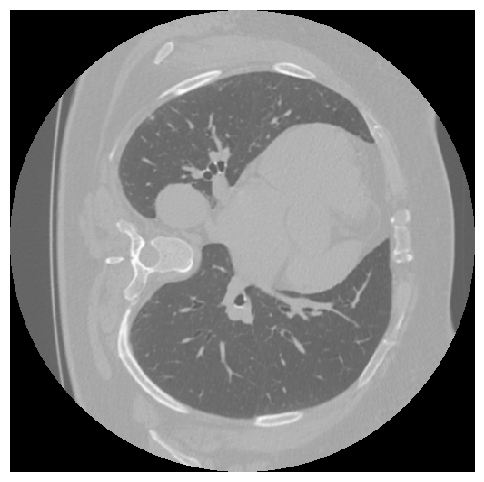

In [ ]:
import matplotlib.pyplot as plt
import nibabel as nib

filepath1 = '/content/drive/MyDrive/COVID19_1110/COVID19_1110/Mosmed_lungCT/CT-1/study_0260.nii.gz'
img1 = nib.load(filepath1)
not1 = img1.get_fdata()


plt.figure(figsize=(6, 6))
plt.pcolormesh(not1[:, :, 19], cmap='Greys_r')
plt.axis('off')
plt.show()

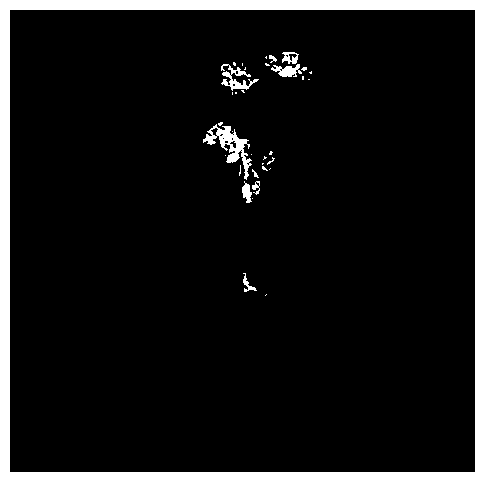

In [ ]:
import matplotlib.pyplot as plt
import nibabel as nib

filepath1 = '/content/drive/MyDrive/COVID19_1110/COVID19_1110/moshmed50_masks/study_0260_mask.nii.gz'
img1 = nib.load(filepath1)
not1 = img1.get_fdata()


plt.figure(figsize=(6, 6))
plt.pcolormesh(not1[:, :, 12], cmap='Greys_r')
plt.axis('off')
plt.show()

In [ ]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
nii_file = '/content/drive/MyDrive/COVID19_1110/COVID19_1110/studies/CT-0/study_0001.nii.gz'
nii_img = nib.load(nii_file)
nii_data = nii_img.get_fdata()
slice_index = 20
normalized_data = (nii_data[:, :, slice_index] - np.min(nii_data)) / (np.max(nii_data) - np.min(nii_data))
normalized_data *= 255
normalized_data = normalized_data.astype(np.uint8)
output_file = '/content/20_slice_5.jpg'
plt.imsave(output_file, normalized_data, cmap='gray')
print(f"Slice saved as {output_file}.")


FileNotFoundError: No such file or no access: '/content/drive/MyDrive/COVID19_1110/COVID19_1110/studies/CT-0/study_0001.nii.gz'

In [ ]:
pip install nibabel matplotlib


In [ ]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Load the NIfTI file
nii_file = '/content/drive/MyDrive/COVID19_1110/COVID19_1110/masks/study_0275_mask.nii.gz'
nii_img = nib.load(nii_file)

# Access the image data as a NumPy array
nii_data = nii_img.get_fdata()

# Iterate over each slice and save as JPEG
output_dir = '/content/drive/MyDrive/c1_mask/275'

# Iterate over the slices along the third dimension
for slice_index in range(nii_data.shape[2]):
    # Normalize the intensity values to the range [0, 255]
    normalized_data = (nii_data[:, :, slice_index] - np.min(nii_data)) / (np.max(nii_data) - np.min(nii_data))
    normalized_data *= 255
    normalized_data = normalized_data.astype(np.uint8)

    # Save the slice as a JPEG image
    output_file = output_dir + f'slice_{slice_index}.jpg'
    plt.imsave(output_file, normalized_data, cmap='gray')

print(f"All slices saved in {output_dir}.")


All slices saved in /content/drive/MyDrive/c1_mask/275.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import clear_border
from skimage import measure
from skimage.measure import label,regionprops
from scipy import ndimage as ndi
from scipy.ndimage import measurements, center_of_mass, binary_dilation, zoom
import plotly.graph_objects as go
import SimpleITK as sitk

In [ ]:
threshold = -650

In [ ]:
import SimpleITK as sitk
import numpy as np
from skimage import measure
from scipy.ndimage import label

# Load the 3D lung CT image
image_path = "/content/drive/MyDrive/COVID19_1110/COVID19_1110/Mosmed_lungCT/CT-3/study_1077.nii.gz"  # Replace with the path to your CT image
ct_image = sitk.ReadImage(image_path)

# Convert CT image to a NumPy array
ct_array = sitk.GetArrayFromImage(ct_image)

# Preprocess the CT image if necessary (e.g., rescaling, noise reduction)

# Threshold the CT image to extract lung regions
lung_mask = np.zeros_like(ct_array)
lung_mask[ct_array >= threshold] = 1  # Replace 'threshold' with your desired threshold value

# Perform connected component labeling to separate lung regions
labels, num_labels = label(lung_mask)

# Identify the largest connected component (assumed to be the lungs)
largest_label = 0
largest_size = 0
for label_val in range(1, num_labels + 1):
    size = np.sum(labels == label_val)
    if size > largest_size:
        largest_size = size
        largest_label = label_val

# Create a new binary mask for the lung region
lung_mask = np.zeros_like(ct_array)
lung_mask[labels == largest_label] = 1

# Optional: Perform additional post-processing steps on the lung mask
# For example, morphological operations, hole filling, etc.

# Convert the lung mask back to a SimpleITK image
lung_mask_image = sitk.GetImageFromArray(lung_mask.astype(np.uint8))
lung_mask_image.CopyInformation(ct_image)

# Save or display the resulting lung mask (optional)
output_path = "/content/study_1077.nii.gz"  # Replace with the desired output path
sitk.WriteImage(lung_mask_image, output_path)


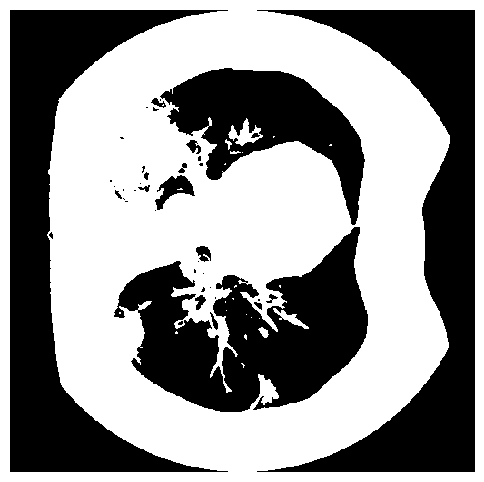

In [ ]:
import matplotlib.pyplot as plt
import nibabel as nib

filepath1 = '/content/study_1077.nii.gz'
img1 = nib.load(filepath1)
not1 = img1.get_fdata()


plt.figure(figsize=(6, 6))
plt.pcolormesh(not1[:, :, 15], cmap='Greys_r')
plt.axis('off')
plt.show()


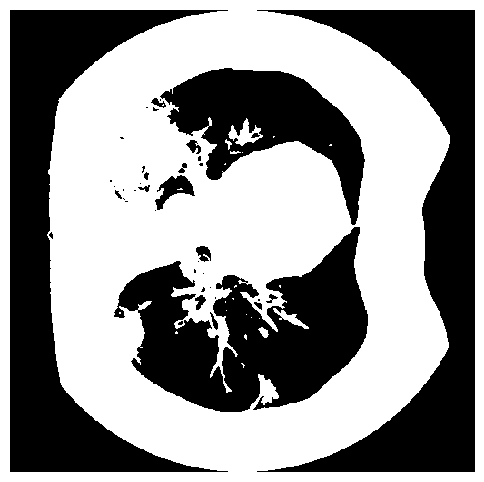

In [ ]:
import matplotlib.pyplot as plt
import nibabel as nib

filepath1 = '/content/study_1077.nii.gz'
img1 = nib.load(filepath1)
not1 = img1.get_fdata()


plt.figure(figsize=(6, 6))
plt.pcolormesh(not1[:, :, 15], cmap='Greys_r')
plt.axis('off')
plt.show()


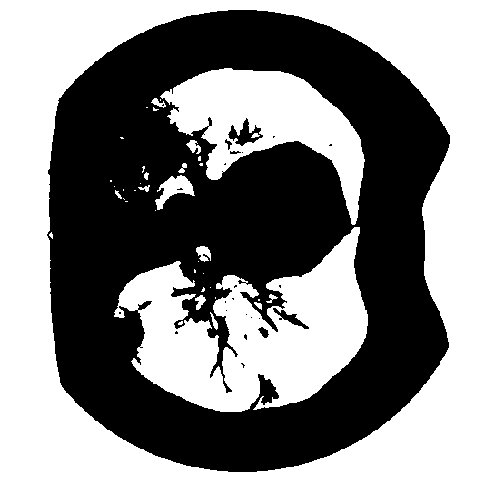

In [ ]:
import SimpleITK as sitk

# Load the 3D image
image_path = "/content/study_1077.nii.gz"
image = sitk.ReadImage(image_path)

# Perform bitwise NOT operation
bitwise_not_image = sitk.Not(image)

# Save the result as a new image
result_path = "/content/bitwise_not_study_1077.nii.gz"
sitk.WriteImage(bitwise_not_image, result_path)

filepath = '/content/bitwise_not_study_1077.nii.gz'
img = nib.load(filepath)
data = img.get_fdata()

plt.figure(figsize=(6, 6))
plt.pcolormesh(data[:, :, 15], cmap='Greys_r')
plt.axis('off')
plt.show()

In [ ]:
mask = np.vectorize(clear_border, signature='(n,m)->(n,m)')(data)


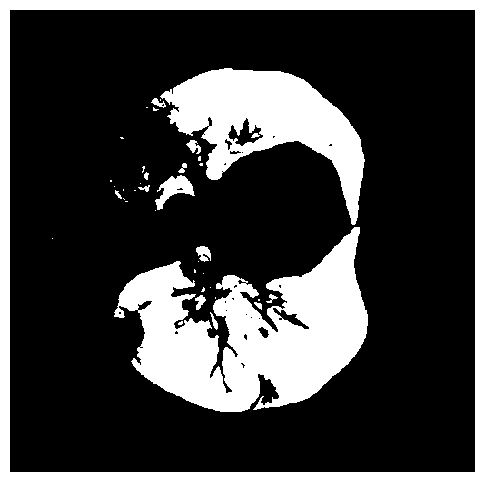

In [ ]:
plt.figure(figsize=(6, 6))
plt.pcolormesh(mask[:, :, 15], cmap='Greys_r')
plt.axis('off')
plt.show()

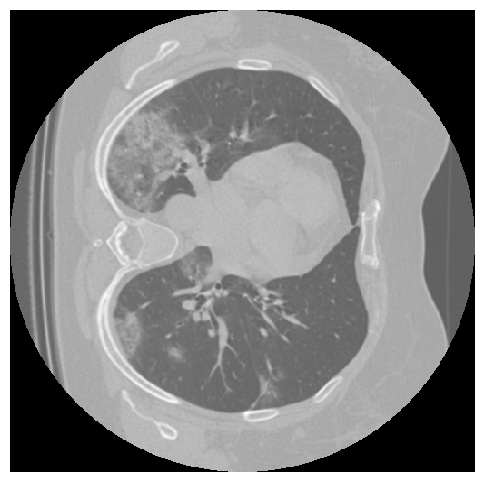

In [ ]:
import matplotlib.pyplot as plt
import nibabel as nib

filepath = '/content/drive/MyDrive/COVID19_1110/COVID19_1110/Mosmed_lungCT/CT-3/study_1077.nii.gz'
img = nib.load(filepath)
data_img = img.get_fdata()


plt.figure(figsize=(6, 6))
plt.pcolormesh(data_img[:, :, 15], cmap='Greys_r')
plt.axis('off')
plt.show()


In [ ]:
img_new = mask * data_img

In [ ]:
pip install nibabel


In [ ]:
import nibabel as nib

# Create a NIfTI image object
nifti_img = nib.Nifti1Image(img_new, affine=None)

# Save the NIfTI image to a file
nib.save(nifti_img, '/content/img_new.nii.gz')


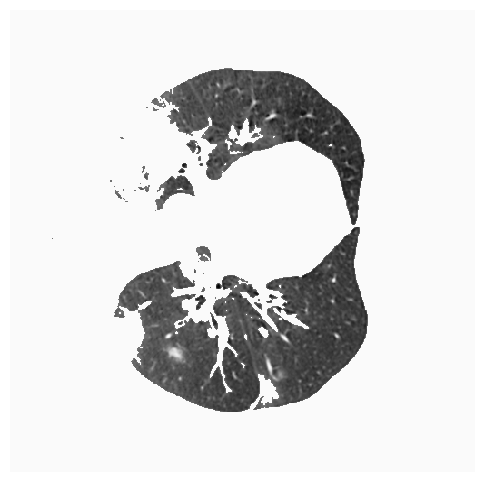

In [ ]:
mask5 = np.vectorize(clear_border, signature='(n,m)->(n,m)')(img_new)
plt.figure(figsize=(6, 6))
plt.pcolormesh(mask5[:, :, 15], cmap='Greys_r')
plt.axis('off')
plt.show()

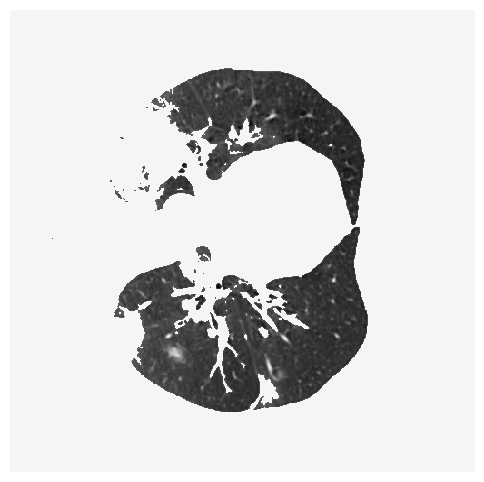

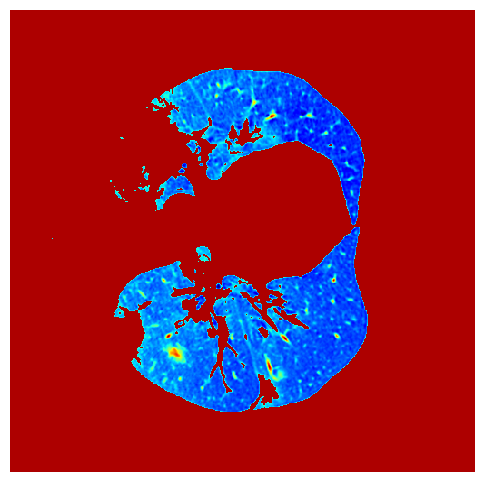

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



# Create a copy of the mask for marking the GGO
marked_image = np.copy(mask5)

# Identify the GGO region (assuming GGO pixels have a specific value, e.g., 1)
ggo_value = 1
ggo_indices = np.where(mask5 == ggo_value)

# Mark the GGO region in the copy of the mask
marked_image[ggo_indices] = 3  # Assign a different value (e.g., 2) to mark the GGO

# Display the original lung mask and the marked GGO region
plt.figure(figsize=(6, 6))
plt.pcolormesh(mask5[:, :, 15], cmap='gray')
plt.axis('off')
plt.show()

import nibabel as nib

# Create a NIfTI image object
nifti_img = nib.Nifti1Image(marked_image, affine=None)

# Save the NIfTI image to a file
nib.save(nifti_img, '/content/sample_data/final_output.nii.gz')


plt.figure(figsize=(6, 6))
plt.pcolormesh(marked_image[:, :, 15], cmap='jet')
plt.axis('off')
plt.show()

plt.tight_layout()
plt.show()


In [ ]:
pip install vispy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.6 MB/s eta 0:00:00


In [ ]:
pip install PyQt5


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.1/338.1 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 10.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import vispy.scene
from vispy.scene import visuals
import nibabel as nib

# Load the .nii.gz file
file_path = "/content/sample_data/final_output.nii.gz"
img = nib.load(file_path)
data = img.get_fdata()

# Make a canvas and add a simple view
canvas = vispy.scene.SceneCanvas(keys='interactive', show=True)
view = canvas.central_widget.add_view()

# Reshape the 3D data into a flat array of points
pos = np.column_stack(np.where(data > threshold))  # Use a threshold to extract points

# Create scatter object and fill in the data
scatter = visuals.Markers()
scatter.set_data(pos, edge_width=0, face_color=(1, 1, 1, .5), size=5)

view.add(scatter)

view.camera = 'turntable'  # or try 'arcball'

# Add a colored 3D axis for orientation
axis = visuals.XYZAxis(parent=view.scene)

if __name__ == '__main__':
    import sys
    if sys.flags.interactive != 1:
        vispy.app.run()


be used ("Could not initialize"). 
Note that running multiple GUI toolkits simultaneously can cause side effects.
be used ("Could not initialize"). 
Note that running multiple GUI toolkits simultaneously can cause side effects.
be used ("Could not import Tkinter or pyopengltk, module(s) not found."). 
Note that running multiple GUI toolkits simultaneously can cause side effects.
be used ("Could not import Tkinter or pyopengltk, module(s) not found."). 
Note that running multiple GUI toolkits simultaneously can cause side effects.


RuntimeError: Could not import any of the backends. You need to install any of ['PyQt4', 'PyQt5', 'PyQt6', 'PySide', 'PySide2', 'PySide6', 'Pyglet', 'Glfw', 'SDL2', 'wx', 'EGL', 'osmesa', 'tkinter']. We recommend PyQt

In [ ]:
pip install --upgrade scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 26.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.3
    Uninstalling scikit-image-0.19.3:
      Successfully uninstalled scikit-image-0.19.3


In [ ]:
import numpy as np
import nibabel as nib

def extract_missing_portions(lung_ct_scan_path, segmented_lung_path, output_path, threshold=300):
    # Load the 3D lung CT scan and the segmented lung area
    lung_ct_scan = nib.load(lung_ct_scan_path).get_fdata()
    segmented_lung = nib.load(segmented_lung_path).get_fdata()

    # Identify missing portions by finding the difference between lung CT and segmented lung
    missing_portions = lung_ct_scan - segmented_lung

    # Thresholding to create a binary mask of missing portions
    missing_mask = missing_portions > threshold

    # Extract the missing portions only within the segmented lung area
    missing_portions_in_lung = missing_mask * segmented_lung

    # Save the result as a new NIfTI file
    missing_nifti = nib.Nifti1Image(missing_portions_in_lung, affine=None)
    nib.save(missing_nifti, output_path)

if __name__ == "__main__":
    lung_ct_scan_path = "/content/drive/MyDrive/COVID19_1110/COVID19_1110/Mosmed_lungCT/CT-3/study_1077.nii.gz"
    segmented_lung_path = "/content/sample_data/final_output.nii.gz"
    output_path = "/content/missing_portions_in_segmented_lung.nii.gz"

    extract_missing_portions(lung_ct_scan_path, segmented_lung_path, output_path)


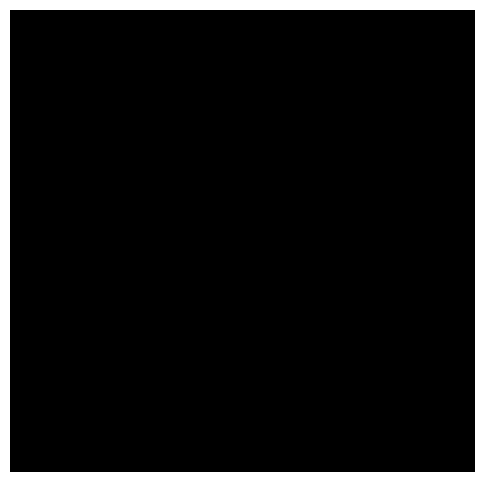

In [ ]:
import matplotlib.pyplot as plt
import nibabel as nib

filepath = '/content/missing_portions_in_segmented_lung.nii.gz'
img = nib.load(filepath)
data_img = img.get_fdata()


plt.figure(figsize=(6, 6))
plt.pcolormesh(data_img[:, :, 15], cmap='Greys_r')
plt.axis('off')
plt.show()


In [ ]:
pip install pyvista

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 MB 9.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pyvista as pv
import nibabel as nib

# Load raw CT data
ct_file_path = '/content/drive/MyDrive/COVID19_1110/COVID19_1110/Mosmed_lungCT/CT-3/study_1077.nii.gz'
ct_img = nib.load(ct_file_path)
ct_data = ct_img.get_fdata()

# Load lung mask data
lung_mask_file_path = '/content/sample_data/final_output.nii.gz'
lung_mask_img = nib.load(lung_mask_file_path)
lung_mask_data = lung_mask_img.get_fdata()

# Extract lung points based on the mask
lung_points = np.array(np.where(lung_mask_data)).T

# Create a PyVista PolyData object from the lung points
lung_point_cloud = pv.PolyData(lung_points)

# Visualize the lung point cloud

lung_point_cloud.save('lung_point_cloud.ply')


/usr/local/lib/python3.10/dist-packages/pyvista/core/utilities/points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


In [ ]:
import numpy as np
import pyvista as pv
import nibabel as nib

# Load raw CT data
ct_file_path = '/content/drive/MyDrive/COVID19_1110/COVID19_1110/Mosmed_lungCT/CT-3/study_1077.nii.gz'
ct_img = nib.load(ct_file_path)
ct_data = ct_img.get_fdata()

# Load lung mask data
lung_mask_file_path = '/content/sample_data/final_output.nii.gz'
lung_mask_img = nib.load(lung_mask_file_path)
lung_mask_data = lung_mask_img.get_fdata()

# Extract lung points based on the mask
lung_points = np.array(np.where(lung_mask_data)).T

# Create a PyVista PolyData object from the lung points
lung_point_cloud = pv.PolyData(lung_points)

# Create a point scalar array based on pixel values
pixel_values = ct_data[lung_points[:, 0], lung_points[:, 1], lung_points[:, 2]]
lung_point_cloud["PixelValues"] = pixel_values

# Set point size and color map
point_size = 5.0
cmap = "viridis"  # You can choose a different colormap

# Save the point cloud with colors
output_file_path = 'lung_point_cloud_with_colors.vtk'
lung_point_cloud.save(output_file_path)




/usr/local/lib/python3.10/dist-packages/pyvista/core/utilities/points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


NameError: name 'lung_point_cloud' is not defined

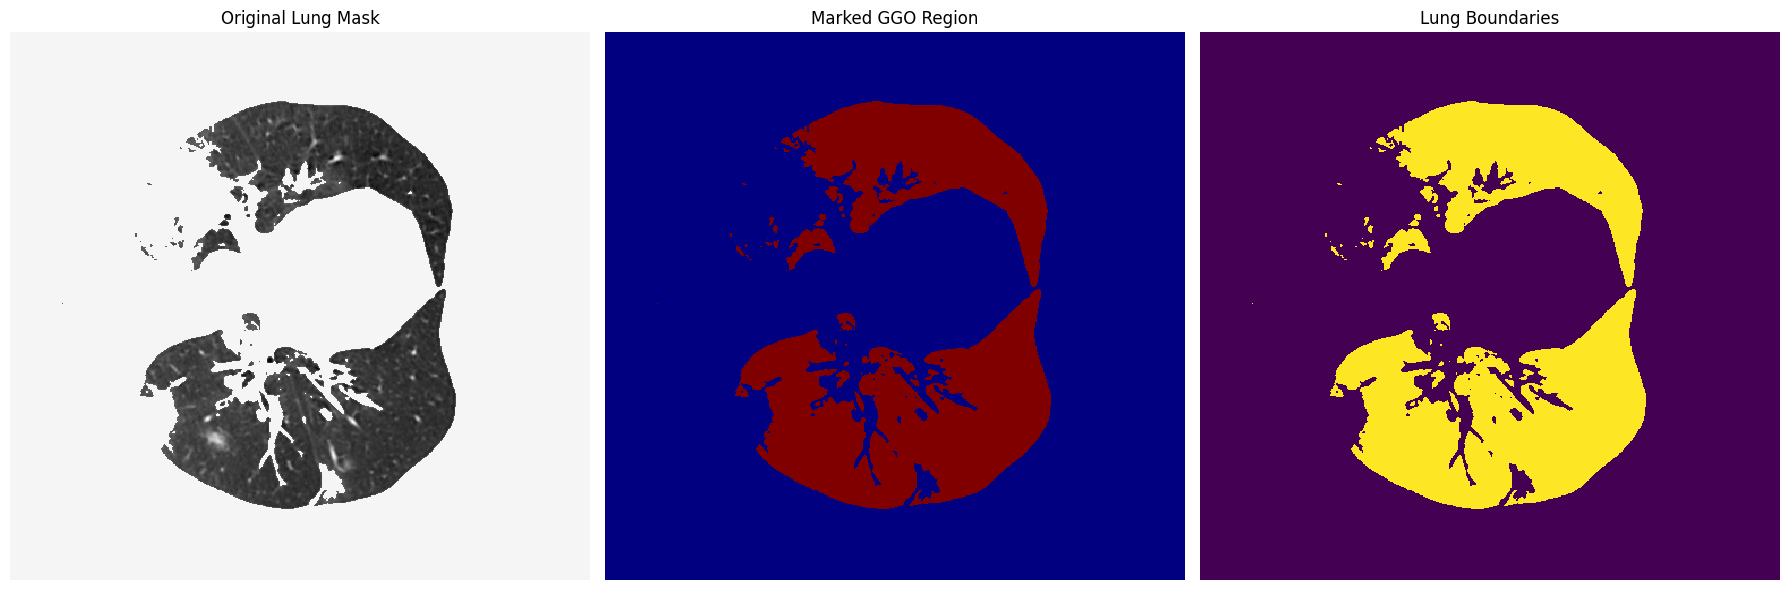

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
from skimage.segmentation import find_boundaries

def add_lung_border(input_file, output_file):
    # Load the NIfTI image
    nifti_img = nib.load(input_file)
    mask5 = nifti_img.get_fdata()

    # Create a copy of the mask for marking the GGO
    marked_image = np.copy(mask5)

    # Identify the GGO region (assuming GGO pixels have a specific value, e.g., 1)
    ggo_value = 1
    ggo_indices = np.where(mask5 == ggo_value)

    # Mark the GGO region in the copy of the mask
    marked_image[ggo_indices] = 3  # Assign a different value (e.g., 3) to mark the GGO

    # Find boundaries of the lung mask to create a border
    lung_boundaries = find_boundaries(mask5, mode='inner')

    # Mark the lung boundaries in the copy of the mask
    marked_image[lung_boundaries] = 2  # Assign a different value (e.g., 2) for lung boundaries

    # Display the original lung mask, the marked GGO region, and the lung boundaries (optional)
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    plt.pcolormesh(mask5[:, :, 15], cmap='gray')
    plt.title('Original Lung Mask')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.pcolormesh(marked_image[:, :, 15], cmap='jet')
    plt.title('Marked GGO Region')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.pcolormesh(lung_boundaries[:, :, 15], cmap='viridis')
    plt.title('Lung Boundaries')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Save the final marked image with lung boundaries to a NIfTI file
    output_nifti = nib.Nifti1Image(marked_image, nifti_img.affine)
    nib.save(output_nifti, output_file)

# Example usage:
input_file = '/content/final_output.nii.gz'
output_file = '/content/final_final_output.nii.gz'

add_lung_border(input_file, output_file)


In [ ]:
import imageio
from skimage.metrics import peak_signal_noise_ratio, structural_similarity, mean_squared_error

# Load the reference and distorted images
reference_image = imageio.imread('/content/download (13).png')
distorted_image = imageio.imread('/content/download (12).png')

# Calculate PSNR
psnr = peak_signal_noise_ratio(reference_image, distorted_image)

# Calculate SSIM
ssim = structural_similarity(reference_image, distorted_image, multichannel=True)

# Calculate MSE
mse = mean_squared_error(reference_image, distorted_image)

print("PSNR:", psnr)
print("SSIM:", ssim)
print("MSE:", mse)


PSNR: 7.126146273981389
SSIM: 0.5679290028132697
MSE: 12602.761961609684


<ipython-input-44-d42d4aa44968>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  reference_image = imageio.imread('/content/download (13).png')
<ipython-input-44-d42d4aa44968>:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  distorted_image = imageio.imread('/content/download (12).png')
<ipython-input-44-d42d4aa44968>:12: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim = structural_similarity(reference_image, distorted_image, multichannel=True)


In [ ]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Load the NIfTI file
nii_file = '/content/final_output.nii.gz'
nii_img = nib.load(nii_file)

# Access the image data as a NumPy array
nii_data = nii_img.get_fdata()

# Iterate over each slice and save as JPEG
output_dir = '/content/drive/MyDrive/COVID19_1110/slices/SLices_chowa/SLices_'

# Iterate over the slices along the third dimension
for slice_index in range(nii_data.shape[2]):
    # Normalize the intensity values to the range [0, 255]
    normalized_data = (nii_data[:, :, slice_index] - np.min(nii_data)) / (np.max(nii_data) - np.min(nii_data))
    normalized_data *= 255
    normalized_data = normalized_data.astype(np.uint8)

    # Save the slice as a JPEG image
    output_file = output_dir + f'slice_{slice_index}.jpg'
    plt.imsave(output_file, normalized_data, cmap='gray')

print(f"All slices saved in {output_dir}.")


All slices saved in /content/drive/MyDrive/COVID19_1110/slices/SLices_chowa/SLices_.


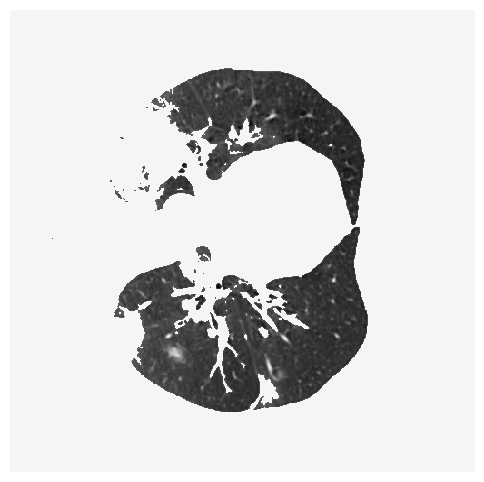

In [ ]:
import matplotlib.pyplot as plt
import nibabel as nib

filepath = '/content/final_output.nii.gz'
img_final = nib.load(filepath)
data_img_final = img_final.get_fdata()


plt.figure(figsize=(6, 6))
plt.pcolormesh(data_img_final[:, :, 15], cmap='gray')
plt.axis('off')
plt.show()


In [ ]:
import nibabel as nib
import numpy as np
from PIL import Image
import os

nii_file = '/content/sample_data/new/final_output.nii.gz'
output_folder = '/content/slices4/'

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

nii_img = nib.load(nii_file)
nii_data = nii_img.get_fdata()

for slice_index in range(nii_data.shape[2]):
    normalized_data = (nii_data[:, :, slice_index] - np.min(nii_data)) / (np.max(nii_data) - np.min(nii_data))
    normalized_data *= 255
    normalized_data = normalized_data.astype(np.uint8)
    output_file = os.path.join(output_folder, f"slice_{slice_index}.tif")
    image = Image.fromarray(normalized_data)
    image.save(output_file)

print(f"All slices saved in {output_folder}.")


All slices saved in /content/slices4/.


In [ ]:
!pip install tifffile

In [ ]:
import cv2
import math
import numpy as np
import os

# creates a point cloud file (.ply) from numpy array
def createPointCloud(filename, arr):
    # open file and write boilerplate header
    file = open(filename, 'w');
    file.write("ply\n");
    file.write("format ascii 1.0\n");

    # count number of vertices
    num_verts = arr.shape[0];
    file.write("element vertex " + str(num_verts) + "\n");
    file.write("property float32 x\n");
    file.write("property float32 y\n");
    file.write("property float32 z\n");
    file.write("end_header\n");

    # write points
    point_count = 0;
    for point in arr:
        # progress check
        point_count += 1;
        if point_count % 1000 == 0:
            print("Point: " + str(point_count) + " of " + str(len(arr)));

        # create file string
        out_str = "";
        for axis in point:
            out_str += str(axis) + " ";
        out_str = out_str[:-1]; # dump the extra space
        out_str += "\n";
        file.write(out_str);
    file.close();


# extracts points from mask and adds to list
def addPoints(mask, points_list, depth):
    mask_points = np.where(mask == 255);
    for ind in range(len(mask_points[0])):
        # get point
        x = mask_points[1][ind];
        y = mask_points[0][ind];
        point = [x,y,depth];
        points_list.append(point);

def main():
    slice_thickness = .2; # distance between slices
    xy_scale = 1; # rescale of xy distance

    # load images
    folder = "/content/slices4"
    files = os.listdir(folder)
    images = []
    for file in files:
        if file.endswith(".tif"):
            img = cv2.imread(os.path.join(folder, file), cv2.IMREAD_GRAYSCALE)
            # Modify the resize operation with the desired size
            img = cv2.resize(img, (200, 200))  # Adjust the size as per your requirement
            images.append(img)

    # keep a blank mask
    blank_mask = np.zeros_like(images[0], np.uint8);

    # create masks
    masks = [];
    masks.append(blank_mask);
    for image in images:
        # mask
        mask = cv2.inRange(image, 0, 100);

        # show
        #cv2.imshow("Mask", mask);
        cv2.waitKey(1);
        masks.append(mask);
    masks.append(blank_mask);
    cv2.destroyAllWindows();

    # go through and get points
    depth = 0;
    points = [];
    for index in range(1,len(masks)-1):
        # progress check
        print("Index: " + str(index) + " of " + str(len(masks)));

        # get three masks
        prev = masks[index - 1];
        curr = masks[index];
        after = masks[index + 1];

        # do a slice on previous
        prev_mask = np.zeros_like(curr);
        prev_mask[prev == 0] = curr[prev == 0];
        addPoints(prev_mask, points, depth);

        # # do a slice on after
        next_mask = np.zeros_like(curr);
        next_mask[after == 0] = curr[after == 0];
        addPoints(next_mask, points, depth);

        # get contour points (_, contours) in OpenCV 2.* or 4.*
        contours, _ = cv2.findContours(curr, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE);
        for con in contours:
            for point in con:
                p = point[0]; # contours have an extra layer of brackets
                points.append([p[0], p[1], depth]);

        # increment depth
        depth += slice_thickness;

    # rescale x,y points
    for ind in range(len(points)):
        # unpack
        x,y,z = points[ind];

        # scale
        x *= xy_scale;
        y *= xy_scale;
        points[ind] = [x,y,z];

    # convert points to numpy and dump duplicates
    points = np.array(points).astype(np.float32);
    points = np.unique(points.reshape(-1, points.shape[-1]), axis=0);
    print(points.shape);

    # save to point cloud file
    createPointCloud("output4.ply", points);

if __name__ == "__main__":
    main();

Index: 1 of 35
Index: 2 of 35
Index: 3 of 35
Index: 4 of 35
Index: 5 of 35
Index: 6 of 35
Index: 7 of 35
Index: 8 of 35
Index: 9 of 35
Index: 10 of 35
Index: 11 of 35
Index: 12 of 35
Index: 13 of 35
Index: 14 of 35
Index: 15 of 35
Index: 16 of 35
Index: 17 of 35
Index: 18 of 35
Index: 19 of 35
Index: 20 of 35
Index: 21 of 35
Index: 22 of 35
Index: 23 of 35
Index: 24 of 35
Index: 25 of 35
Index: 26 of 35
Index: 27 of 35
Index: 28 of 35
Index: 29 of 35
Index: 30 of 35
Index: 31 of 35
Index: 32 of 35
Index: 33 of 35
(120547, 3)
Point: 1000 of 120547
Point: 2000 of 120547
Point: 3000 of 120547
Point: 4000 of 120547
Point: 5000 of 120547
Point: 6000 of 120547
Point: 7000 of 120547
Point: 8000 of 120547
Point: 9000 of 120547
Point: 10000 of 120547
Point: 11000 of 120547
Point: 12000 of 120547
Point: 13000 of 120547
Point: 14000 of 120547
Point: 15000 of 120547
Point: 16000 of 120547
Point: 17000 of 120547
Point: 18000 of 120547
Point: 19000 of 120547
Point: 20000 of 120547
Point: 21000 of 12

In [ ]:
!python3.10 -m pip install --upgrade meshlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.6/66.6 MB 5.5 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade meshlib

In [ ]:
!pip install pyvista


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 MB 9.7 MB/s eta 0:00:00


In [ ]:
!pip install trimesh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.0/689.0 kB 4.4 MB/s eta 0:00:00


In [ ]:
import trimesh

# Load the .ply point cloud
point_cloud = trimesh.load_mesh('/content/output4.ply')

# Extract the vertex coordinates
points = point_cloud.vertices

In [ ]:
import numpy as np
import pyvista as pv

# points is a 3D numpy array (n_points, 3) coordinates of a sphere
cloud = pv.PolyData(points)
#cloud.plot()

volume = cloud.delaunay_3d(alpha=2.)
shell = volume.extract_geometry()
#shell.plot()

In [ ]:
import pyvista as pv

# Assuming you have already created the 'shell' mesh

# Save the mesh as .stl
shell.save('/content/demo_CT.stl')
